In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, StratifiedKFold

import pickle

##from Classification import Classification
##from Ensemble import Ensemble

In [79]:
def conf_matrix(cm):

    plt.figure(figsize=(9,9))
    ax = sns.heatmap(cm,
                     annot= True,
                     fmt = '.4g',
                     cbar=0,
                     xticklabels=[1,2,3,4,5],
                     yticklabels=[1,2,3,4,5])

    plt.show()

In [80]:
x_train = pd.read_csv(r'C:\Users\lenovo\PycharmProjects\pythonProject2\Data\Trainn-Test\x_train_data.csv')
y_train = pd.read_csv(r'C:\Users\lenovo\PycharmProjects\pythonProject2\Data\Trainn-Test\y_train_data.csv')

In [81]:
x_test = pd.read_csv(r'C:\Users\lenovo\PycharmProjects\pythonProject2\Data\Trainn-Test\x_test_data.csv')
y_test = pd.read_csv(r'C:\Users\lenovo\PycharmProjects\pythonProject2\Data\Trainn-Test\y_test_data.csv')

In [82]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13208 entries, 0 to 13207
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   rating  13208 non-null  int64
dtypes: int64(1)
memory usage: 103.3 KB


In [83]:
y_train.describe()

,rating
count,13208.000000
mean,3.002196
std,1.413167
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


In [84]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13208 entries, 0 to 13207
Columns: 182 entries, access to would
dtypes: float64(182)
memory usage: 18.3 MB


In [8]:
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train['rating'],test_size=.25,random_state=42)

In [50]:
##skf = StratifiedKFold(n_splits=5,random_state=42,shuffle=True)

Modelling

Multinomial Naive Bayes

Grid Search

In [9]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
###

parameters = {
'alpha': (1,0.1,0.01, 0.001, 0.0001, 0.00001),
'fit_prior' : (True,False),
}
clf = MultinomialNB().fit(x_train, y_train)
predicted= clf.predict(x_val)
##
grid_search= GridSearchCV(clf, parameters, cv=5)
grid_search.fit(x_train,y_train)
###
grid_search.best_estimator_

MultinomialNB(alpha=0.01)

Best Modell

In [10]:
NB_classifier = MultinomialNB(alpha=0.001, fit_prior=False)
NB_classifier.fit(x_train, y_train)

MultinomialNB(alpha=0.001, fit_prior=False)

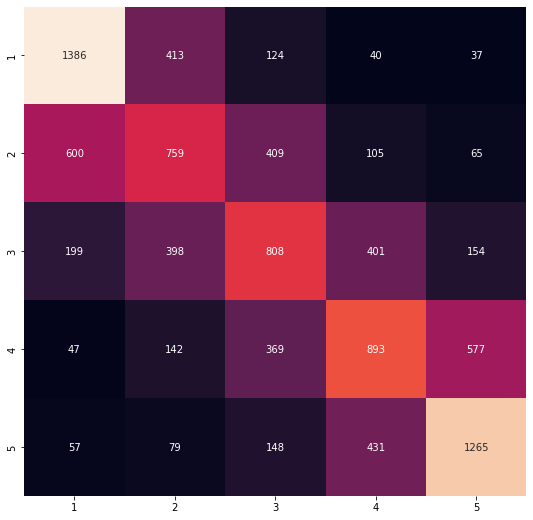

In [11]:
from sklearn.metrics import classification_report, confusion_matrix
y_predict_train = NB_classifier.predict(x_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
conf_matrix(cm)

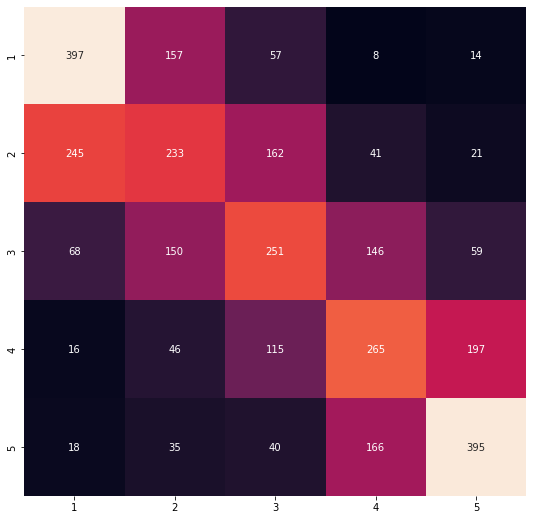

In [12]:
# Predicting the Test set results
y_predict_val = NB_classifier.predict(x_val)
cm = confusion_matrix(y_val, y_predict_val)
conf_matrix(cm)

In [13]:
print(classification_report(y_val, y_predict_val))

              precision    recall  f1-score   support

           1       0.53      0.63      0.58       633
           2       0.38      0.33      0.35       702
           3       0.40      0.37      0.39       674
           4       0.42      0.41      0.42       639
           5       0.58      0.60      0.59       654

    accuracy                           0.47      3302
   macro avg       0.46      0.47      0.46      3302
weighted avg       0.46      0.47      0.46      3302



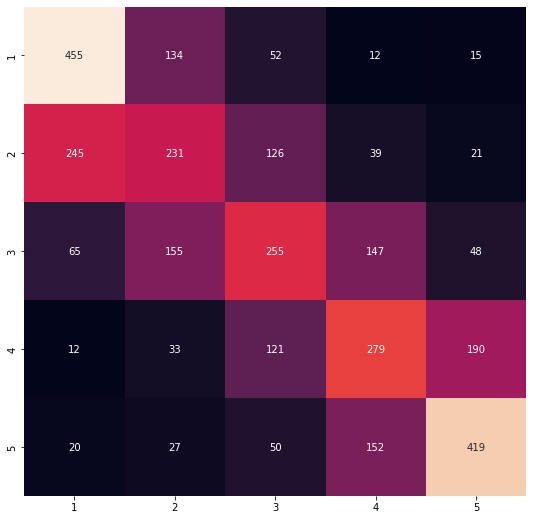

In [18]:
y_predict_test = NB_classifier.predict(x_test)
cm = confusion_matrix(y_test, y_predict_test)
conf_matrix(cm)

In [19]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           1       0.57      0.68      0.62       668
           2       0.40      0.35      0.37       662
           3       0.42      0.38      0.40       670
           4       0.44      0.44      0.44       635
           5       0.60      0.63      0.62       668

    accuracy                           0.50      3303
   macro avg       0.49      0.50      0.49      3303
weighted avg       0.49      0.50      0.49      3303



In [17]:
import sklearn.metrics as metrics
a = 'Multinomial Naive Bayes'
d = {'Model Name': [a],
             'Train Accuracy': [metrics.accuracy_score(y_train, y_predict_train)],
             'Validation Accuracy': [metrics.accuracy_score(y_val, y_predict_val)],
             'Test Accuracy':[metrics.accuracy_score(y_test, y_predict_test)]}
NB_scores_table = pd.DataFrame(data=d)
NB_scores_table

,Model Name,Train Accuracy,Validation Accuracy,Test Accuracy
0,Multinomial Naive Bayes,0.51595,0.466687,0.496216


# Logistic Regression

# Grid Search

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold

model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.482941 using {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.480991 (0.014850) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.480553 (0.014770) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.477018 (0.013696) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.481192 (0.013878) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.481697 (0.013979) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.477893 (0.013782) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.482941 (0.013193) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.482907 (0.013215) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.479071 (0.014093) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.482335 (0.016676) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.482335 (0.016543) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.479474 (0.014541) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.463625 (0.011903) wit

In [22]:
#Best Model

In [23]:
LG_classifier = LogisticRegression(C=1.0, penalty='l2',solver='newton-cg')
LG_classifier.fit(x_train, y_train)

LogisticRegression(solver='newton-cg')

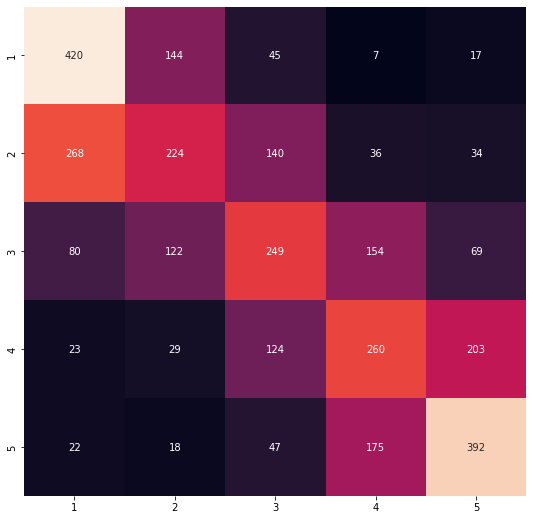

In [24]:
# Predicting the Val set results
y_predict_val = LG_classifier.predict(x_val)
cm = confusion_matrix(y_val, y_predict_val)
conf_matrix(cm)

In [26]:
print(classification_report(y_val, y_predict_val))

              precision    recall  f1-score   support

           1       0.52      0.66      0.58       633
           2       0.42      0.32      0.36       702
           3       0.41      0.37      0.39       674
           4       0.41      0.41      0.41       639
           5       0.55      0.60      0.57       654

    accuracy                           0.47      3302
   macro avg       0.46      0.47      0.46      3302
weighted avg       0.46      0.47      0.46      3302



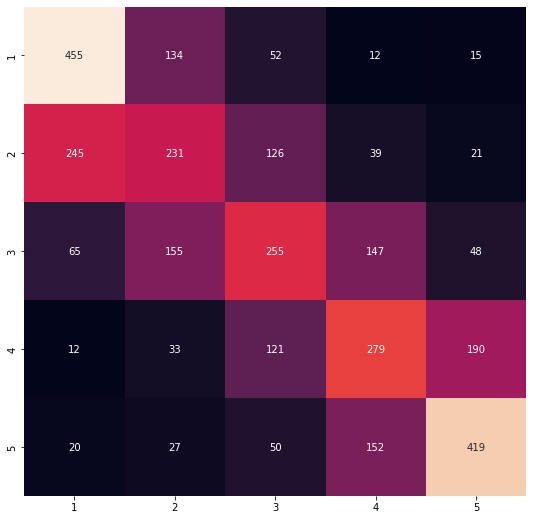

In [27]:
y_predict_test = NB_classifier.predict(x_test)
cm = confusion_matrix(y_test, y_predict_test)
conf_matrix(cm)

In [28]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           1       0.57      0.68      0.62       668
           2       0.40      0.35      0.37       662
           3       0.42      0.38      0.40       670
           4       0.44      0.44      0.44       635
           5       0.60      0.63      0.62       668

    accuracy                           0.50      3303
   macro avg       0.49      0.50      0.49      3303
weighted avg       0.49      0.50      0.49      3303



In [29]:
a = 'Logistic Regression'
d = {'Model Name': [a],
             'Train Accuracy': [metrics.accuracy_score(y_train, y_predict_train)],
             'Validation Accuracy': [metrics.accuracy_score(y_val, y_predict_val)],
             'Test Accuracy':[metrics.accuracy_score(y_test, y_predict_test)]}
LG_scores_table = pd.DataFrame(data=d)
LG_scores_table

,Model Name,Train Accuracy,Validation Accuracy,Test Accuracy
0,Logistic Regression,0.51595,0.467898,0.496216


# KNN

# Grid Search

In [63]:
from sklearn.neighbors import KNeighborsClassifier

# define models and parameters
model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.399792 using {'metric': 'euclidean', 'n_neighbors': 19, 'weights': 'distance'}
0.306145 (0.013309) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.306145 (0.013309) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.290969 (0.014551) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.301366 (0.016155) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.299950 (0.027235) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.312804 (0.021513) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.326130 (0.021058) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.336225 (0.017963) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.352914 (0.017826) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.355371 (0.018752) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.368898

# Best Model

In [91]:
KNN_classifier = KNeighborsClassifier(metric='euclidean', n_neighbors=19,weights='distance')
KNN_classifier.fit(x_train, y_train)

C:\Users\lenovo\anaconda3\envs\SentimentCapstone\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean', n_neighbors=19, weights='distance')

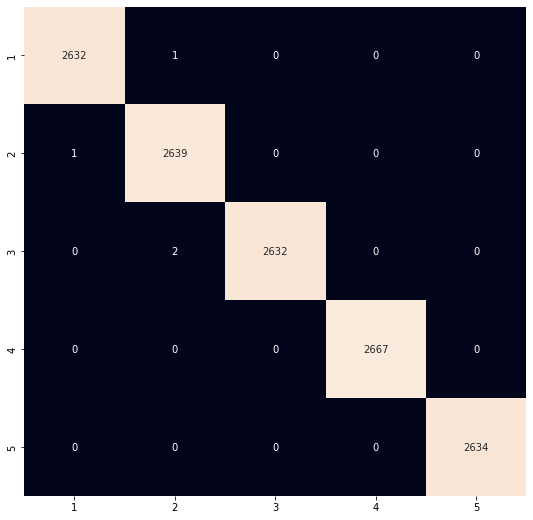

In [92]:
y_predict_train = KNN_classifier.predict(x_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
conf_matrix(cm)

In [93]:
# Predicting the Val set results
y_predict_val = KNN_classifier.predict(x_val)
cm = confusion_matrix(y_val, y_predict_val)
conf_matrix(cm)

C:\Users\lenovo\anaconda3\envs\SentimentCapstone\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- count

  warnings.warn(message, FutureWarning)


ValueError: X has 182 features, but KNeighborsClassifier is expecting 183 features as input.

In [ ]:
print(classification_report(y_val, y_predict_val))

In [ ]:
y_predict_test = NB_classifier.predict(x_test)
cm = confusion_matrix(y_test, y_predict_test)
conf_matrix(cm)

In [ ]:
print(classification_report(y_test, y_predict_test))

In [ ]:
a = 'KNeighborsClassifier'
d = {'Model Name': [a],
             'Train Accuracy': [metrics.accuracy_score(y_train, y_predict_train)],
             'Validation Accuracy': [metrics.accuracy_score(y_val, y_predict_val)],
             'Test Accuracy':[metrics.accuracy_score(y_test, y_predict_test)]}
KNN_scores_table = pd.DataFrame(data=d)
KNN_scores_table

# Support Vector Machine

# Grid Search

In [77]:
from sklearn.svm import SVC
# define model and parameters
model = SVC()
kernel = ['poly']
gamma = ['scale']
degree = [2 , 3]
# define grid search
grid = dict(kernel=kernel,degree=degree,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.456761 using {'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}
0.456761 (0.012635) with: {'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}
0.453733 (0.013179) with: {'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}


In [78]:
from sklearn.svm import SVC
SVM_classifier = SVC(kernel='poly',degree=2,gamma='scale')
SVM_classifier.fit(x_train, y_train)

SVC(degree=2, kernel='poly')

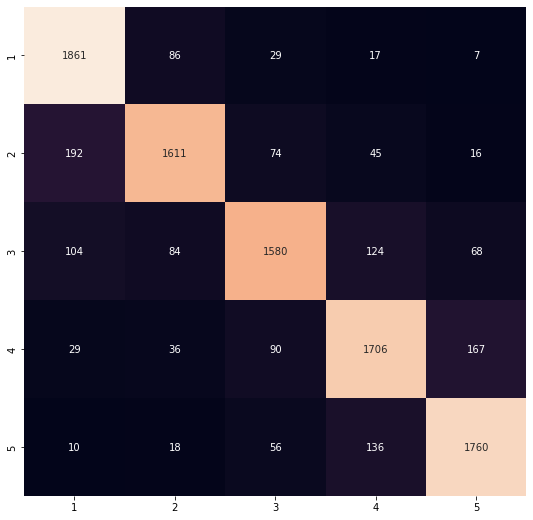

In [79]:
y_predict_train = SVM_classifier.predict(x_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
conf_matrix(cm)

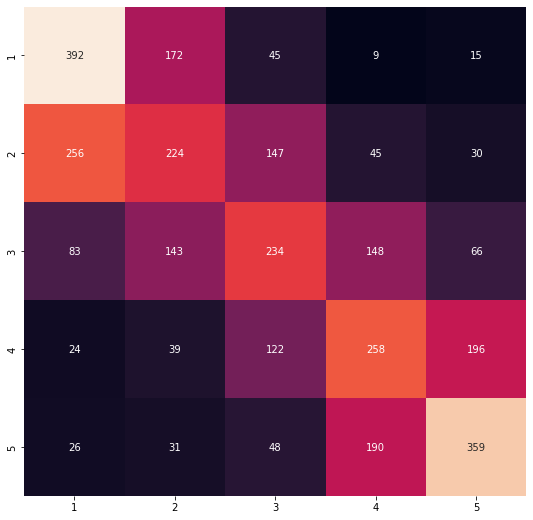

In [80]:
# Predicting the Val set results
y_predict_val = SVM_classifier.predict(x_val)
cm = confusion_matrix(y_val, y_predict_val)
conf_matrix(cm)

In [81]:
print(classification_report(y_val, y_predict_val))

              precision    recall  f1-score   support

           1       0.50      0.62      0.55       633
           2       0.37      0.32      0.34       702
           3       0.39      0.35      0.37       674
           4       0.40      0.40      0.40       639
           5       0.54      0.55      0.54       654

    accuracy                           0.44      3302
   macro avg       0.44      0.45      0.44      3302
weighted avg       0.44      0.44      0.44      3302



In [ ]:
y_predict_test = NB_classifier.predict(x_test)
cm = confusion_matrix(y_test, y_predict_test)
conf_matrix(cm)

In [ ]:
print(classification_report(y_test, y_predict_test))

In [82]:
a = 'SVM'
d = {'Model Name': [a],
             'Train Accuracy': [metrics.accuracy_score(y_train, y_predict_train)],
             'Validation Accuracy': [metrics.accuracy_score(y_val, y_predict_val)],
             'Test Accuracy':[metrics.accuracy_score(y_test, y_predict_test)]}
SVM_scores_table = pd.DataFrame(data=d)
SVM_scores_table

,Model Name,Train Accuracy,Validation Accuracy,Accuracy Difference
0,SVM,0.859883,0.444276,0.415607


# Random Forest

In [ ]:
# 1 st Attempt

In [32]:
from sklearn.ensemble import RandomForestClassifier
# define models and parameters
model = RandomForestClassifier()
max_depth = [3,5,7,9,11,13,15]
min_samples_leaf = [3,5,10,15,30,50,100]

# define grid search
grid = dict(max_depth=max_depth,min_samples_leaf=min_samples_leaf)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.451982 using {'max_depth': 15, 'min_samples_leaf': 3}
0.410591 (0.015518) with: {'max_depth': 3, 'min_samples_leaf': 3}
0.411400 (0.013737) with: {'max_depth': 3, 'min_samples_leaf': 5}
0.411434 (0.015432) with: {'max_depth': 3, 'min_samples_leaf': 10}
0.409952 (0.013498) with: {'max_depth': 3, 'min_samples_leaf': 15}
0.408808 (0.016893) with: {'max_depth': 3, 'min_samples_leaf': 30}
0.411972 (0.014912) with: {'max_depth': 3, 'min_samples_leaf': 50}
0.409482 (0.013986) with: {'max_depth': 3, 'min_samples_leaf': 100}
0.422808 (0.014367) with: {'max_depth': 5, 'min_samples_leaf': 3}
0.422304 (0.013469) with: {'max_depth': 5, 'min_samples_leaf': 5}
0.423177 (0.014946) with: {'max_depth': 5, 'min_samples_leaf': 10}
0.425364 (0.015304) with: {'max_depth': 5, 'min_samples_leaf': 15}
0.420889 (0.013087) with: {'max_depth': 5, 'min_samples_leaf': 30}
0.417389 (0.015762) with: {'max_depth': 5, 'min_samples_leaf': 50}
0.413723 (0.012901) with: {'max_depth': 5, 'min_samples_leaf': 100}
0.

In [40]:
##RF_scores_table

,Model Name,Train Accuracy,Validation Accuracy,Test Accuracy
0,Random Forest,0.755805,0.433677,0.496216


In [ ]:
# 2 nd Attempt

In [41]:
model = RandomForestClassifier()
max_depth = [13,14,15,16,17,18]
min_samples_leaf = [1,2,3,4,5,6,7,8,9,10]

# define grid search
grid = dict(max_depth=max_depth,min_samples_leaf=min_samples_leaf)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.453530 using {'max_depth': 17, 'min_samples_leaf': 10}
0.444142 (0.014499) with: {'max_depth': 13, 'min_samples_leaf': 1}
0.449492 (0.013588) with: {'max_depth': 13, 'min_samples_leaf': 2}
0.445757 (0.013870) with: {'max_depth': 13, 'min_samples_leaf': 3}
0.446934 (0.014832) with: {'max_depth': 13, 'min_samples_leaf': 4}
0.448652 (0.013025) with: {'max_depth': 13, 'min_samples_leaf': 5}
0.448651 (0.014329) with: {'max_depth': 13, 'min_samples_leaf': 6}
0.449256 (0.015324) with: {'max_depth': 13, 'min_samples_leaf': 7}
0.447674 (0.013410) with: {'max_depth': 13, 'min_samples_leaf': 8}
0.447742 (0.014025) with: {'max_depth': 13, 'min_samples_leaf': 9}
0.447103 (0.015699) with: {'max_depth': 13, 'min_samples_leaf': 10}
0.445924 (0.015062) with: {'max_depth': 14, 'min_samples_leaf': 1}
0.443065 (0.015069) with: {'max_depth': 14, 'min_samples_leaf': 2}
0.447507 (0.014253) with: {'max_depth': 14, 'min_samples_leaf': 3}
0.448281 (0.015276) with: {'max_depth': 14, 'min_samples_leaf': 4

In [50]:
#RF_scores_table

,Model Name,Train Accuracy,Validation Accuracy,Test Accuracy
0,Random Forest,0.648799,0.436705,0.496216


In [ ]:
# 3 nd Attempt

In [51]:
model = RandomForestClassifier()
max_depth = [15,16,17,18,19,20]
min_samples_leaf = [5,6,7,8,9,10,11,12,13,14]

# define grid search
grid = dict(max_depth=max_depth,min_samples_leaf=min_samples_leaf)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.455649 using {'max_depth': 18, 'min_samples_leaf': 5}
0.449358 (0.012871) with: {'max_depth': 15, 'min_samples_leaf': 5}
0.449122 (0.013312) with: {'max_depth': 15, 'min_samples_leaf': 6}
0.448145 (0.015357) with: {'max_depth': 15, 'min_samples_leaf': 7}
0.448683 (0.015737) with: {'max_depth': 15, 'min_samples_leaf': 8}
0.448954 (0.014042) with: {'max_depth': 15, 'min_samples_leaf': 9}
0.447473 (0.013790) with: {'max_depth': 15, 'min_samples_leaf': 10}
0.448954 (0.012990) with: {'max_depth': 15, 'min_samples_leaf': 11}
0.445858 (0.015296) with: {'max_depth': 15, 'min_samples_leaf': 12}
0.446296 (0.014477) with: {'max_depth': 15, 'min_samples_leaf': 13}
0.449760 (0.014523) with: {'max_depth': 15, 'min_samples_leaf': 14}
0.450164 (0.013932) with: {'max_depth': 16, 'min_samples_leaf': 5}
0.452656 (0.012392) with: {'max_depth': 16, 'min_samples_leaf': 6}
0.449796 (0.013889) with: {'max_depth': 16, 'min_samples_leaf': 7}
0.447878 (0.016213) with: {'max_depth': 16, 'min_samples_leaf'

In [52]:
RF_classifier = RandomForestClassifier(max_depth=18,min_samples_leaf=5)
RF_classifier.fit(x_train, y_train)

RandomForestClassifier(max_depth=18, min_samples_leaf=5)

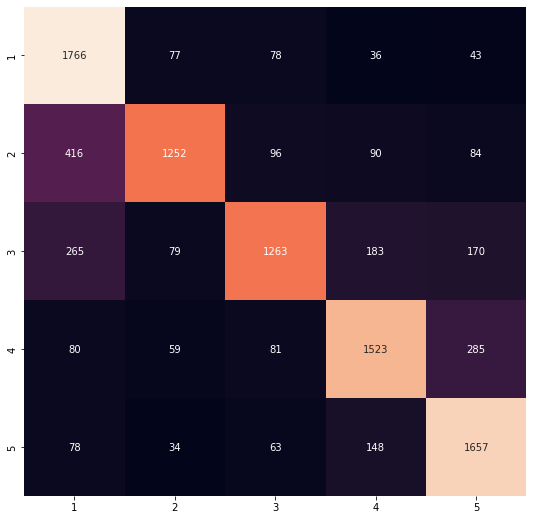

In [53]:
y_predict_train = RF_classifier.predict(x_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
conf_matrix(cm)

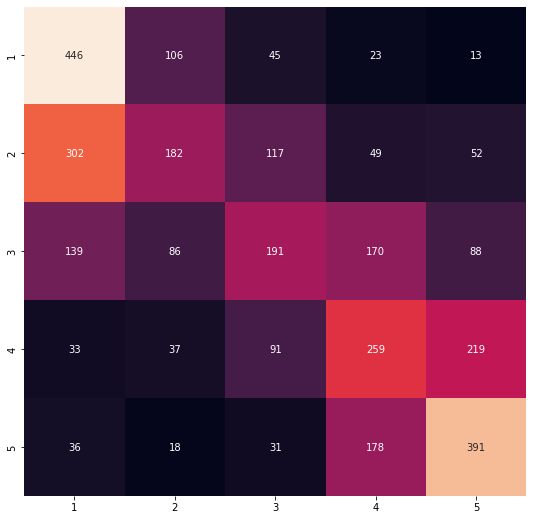

In [54]:
# Predicting the Val set results
y_predict_val = RF_classifier.predict(x_val)
cm = confusion_matrix(y_val, y_predict_val)
conf_matrix(cm)

In [55]:
print(classification_report(y_val, y_predict_val))

              precision    recall  f1-score   support

           1       0.47      0.70      0.56       633
           2       0.42      0.26      0.32       702
           3       0.40      0.28      0.33       674
           4       0.38      0.41      0.39       639
           5       0.51      0.60      0.55       654

    accuracy                           0.44      3302
   macro avg       0.44      0.45      0.43      3302
weighted avg       0.44      0.44      0.43      3302



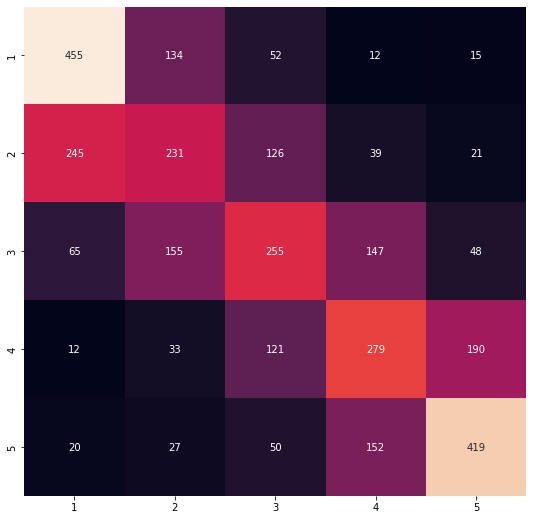

In [56]:
y_predict_test = NB_classifier.predict(x_test)
cm = confusion_matrix(y_test, y_predict_test)
conf_matrix(cm)

In [57]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           1       0.57      0.68      0.62       668
           2       0.40      0.35      0.37       662
           3       0.42      0.38      0.40       670
           4       0.44      0.44      0.44       635
           5       0.60      0.63      0.62       668

    accuracy                           0.50      3303
   macro avg       0.49      0.50      0.49      3303
weighted avg       0.49      0.50      0.49      3303



In [58]:
a = 'Random Forest'
d = {'Model Name': [a],
             'Train Accuracy': [metrics.accuracy_score(y_train, y_predict_train)],
             'Validation Accuracy': [metrics.accuracy_score(y_val, y_predict_val)],
             'Test Accuracy':[metrics.accuracy_score(y_test, y_predict_test)]}
RF_scores_table = pd.DataFrame(data=d)
RF_scores_table

,Model Name,Train Accuracy,Validation Accuracy,Test Accuracy
0,Random Forest,0.75318,0.444882,0.496216


# Bagged Decision Trees

In [60]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
max_depth = [3,5,10,15,30,50,100]
min_samples_leaf = [3,4,5,6,7,8,9]
# define grid search
grid = dict(min_samples_leaf=min_samples_leaf,max_depth=max_depth)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.369909 using {'max_depth': 15, 'min_samples_leaf': 5}
0.299447 (0.011442) with: {'max_depth': 3, 'min_samples_leaf': 3}
0.299447 (0.011442) with: {'max_depth': 3, 'min_samples_leaf': 4}
0.299447 (0.011442) with: {'max_depth': 3, 'min_samples_leaf': 5}
0.299447 (0.011442) with: {'max_depth': 3, 'min_samples_leaf': 6}
0.299447 (0.011442) with: {'max_depth': 3, 'min_samples_leaf': 7}
0.299447 (0.011442) with: {'max_depth': 3, 'min_samples_leaf': 8}
0.299447 (0.011442) with: {'max_depth': 3, 'min_samples_leaf': 9}
0.350326 (0.014288) with: {'max_depth': 5, 'min_samples_leaf': 3}
0.350258 (0.014320) with: {'max_depth': 5, 'min_samples_leaf': 4}
0.350225 (0.014330) with: {'max_depth': 5, 'min_samples_leaf': 5}
0.350191 (0.014124) with: {'max_depth': 5, 'min_samples_leaf': 6}
0.349686 (0.014005) with: {'max_depth': 5, 'min_samples_leaf': 7}
0.349787 (0.014246) with: {'max_depth': 5, 'min_samples_leaf': 8}
0.349888 (0.014226) with: {'max_depth': 5, 'min_samples_leaf': 9}
0.366041 (0.01

In [75]:
#DTC_scores_table -- Best: 0.369909 using {'max_depth': 15, 'min_samples_leaf': 5}

,Model Name,Train Accuracy,Validation Accuracy,Test Accuracy
0,DecisionTreeClassifier,0.585302,0.360388,0.374811


In [ ]:
#2 nd Attempt

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
max_depth = [12,13,14,15,16,17,18]
min_samples_leaf = [2,3,4,5,6,7,8]
# define grid search
grid = dict(min_samples_leaf=min_samples_leaf,max_depth=max_depth)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [68]:
DTC_classifier = DecisionTreeClassifier(max_depth=18,min_samples_leaf=5)
DTC_classifier.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=18, min_samples_leaf=5)

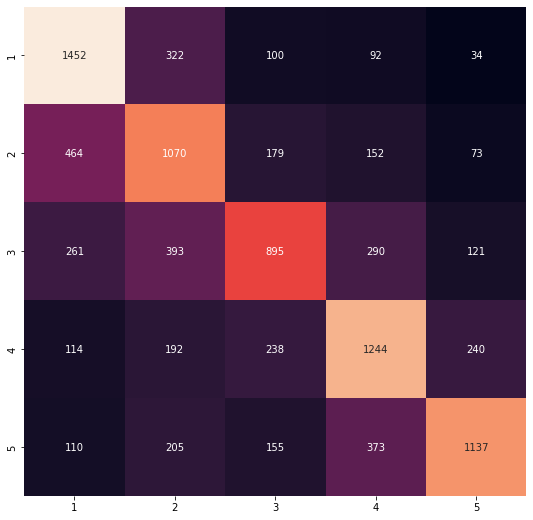

In [69]:
y_predict_train = DTC_classifier.predict(x_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
conf_matrix(cm)

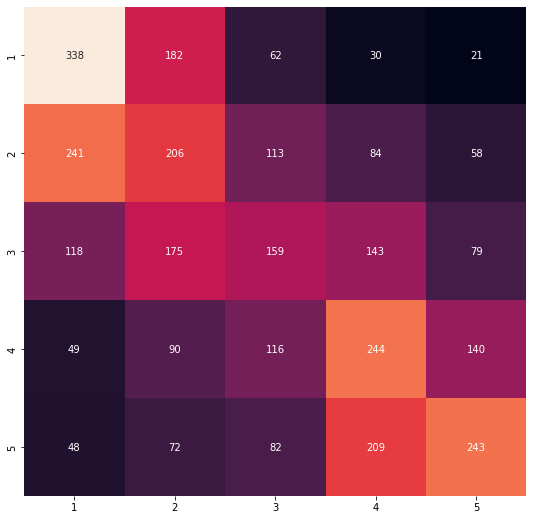

In [70]:
# Predicting the Val set results
y_predict_val = DTC_classifier.predict(x_val)
cm = confusion_matrix(y_val, y_predict_val)
conf_matrix(cm)

In [71]:
print(classification_report(y_val, y_predict_val))

              precision    recall  f1-score   support

           1       0.43      0.53      0.47       633
           2       0.28      0.29      0.29       702
           3       0.30      0.24      0.26       674
           4       0.34      0.38      0.36       639
           5       0.45      0.37      0.41       654

    accuracy                           0.36      3302
   macro avg       0.36      0.36      0.36      3302
weighted avg       0.36      0.36      0.36      3302



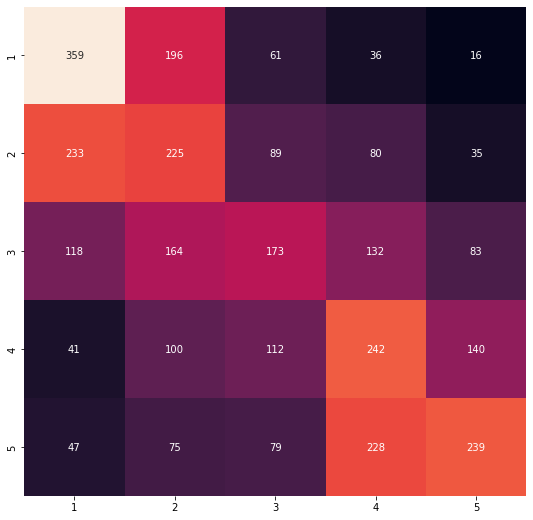

In [72]:
y_predict_test = DTC_classifier.predict(x_test)
cm = confusion_matrix(y_test, y_predict_test)
conf_matrix(cm)

In [73]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           1       0.45      0.54      0.49       668
           2       0.30      0.34      0.32       662
           3       0.34      0.26      0.29       670
           4       0.34      0.38      0.36       635
           5       0.47      0.36      0.40       668

    accuracy                           0.37      3303
   macro avg       0.38      0.37      0.37      3303
weighted avg       0.38      0.37      0.37      3303



In [74]:
a = 'DecisionTreeClassifier'
d = {'Model Name': [a],
             'Train Accuracy': [metrics.accuracy_score(y_train, y_predict_train)],
             'Validation Accuracy': [metrics.accuracy_score(y_val, y_predict_val)],
             'Test Accuracy':[metrics.accuracy_score(y_test, y_predict_test)]}
DTC_scores_table = pd.DataFrame(data=d)
DTC_scores_table

,Model Name,Train Accuracy,Validation Accuracy,Test Accuracy
0,DecisionTreeClassifier,0.585302,0.360388,0.374811


# Ridge Classifier

In [ ]:
from sklearn.linear_model import RidgeClassifier
# define dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)
# define models and parameters
model = RidgeClassifier()
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# define grid search
grid = dict(alpha=alpha)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

# Stochastic Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# define dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)
# define models and parameters
model = GradientBoostingClassifier()
n_estimators = [10, 100, 1000]
learning_rate = [0.001, 0.01, 0.1]
subsample = [0.5, 0.7, 1.0]
max_depth = [3, 7, 9]
# define grid search
grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

# Bring all model one DataFrame

In [90]:
all_models = pd.concat([KNN_scores_table,
                        NB_scores_table,
                        LG_scores_table,
                        SVM_scores_table,
                        RF_scores_table,
                        DTC_scores_table,
                        ],
                        axis=0)
all_models

NameError: name 'KNN_scores_table' is not defined